## Imports

In [36]:
from pathlib import Path
from matplotlib import pyplot as plt
import pandas as pd
from collections import defaultdict
import string
import numpy as np

In [3]:
ROOT_PATH = Path().absolute().parent
ROOT_PATH

PosixPath('/Users/ingridturkerud/Desktop/TDT4900-Master-Thesis')

In [4]:
external_path = ROOT_PATH.joinpath('data', 'external')
interim_path = ROOT_PATH.joinpath('data', 'interim')
processed_path = ROOT_PATH.joinpath('data', 'processed')

In [5]:
para_path = external_path.joinpath('p5.csv')
coco_prep_path = interim_path.joinpath('karpathy_split', 'coco_sub_prep.csv')

In [17]:
para_df = pd.read_csv(para_path)
para_df

,Unnamed: 0,image_id,image_name,caption_id,caption
0,0,1,COCO_val2014_000000522418.jpg,COCO_val2014_000000522418#693204#p,A woman striking a cake with the back of the c...
1,1,1,COCO_val2014_000000522418.jpg,COCO_val2014_000000522418#688839#p,A woman wearing a hair cut net a big cake of t...
2,2,1,COCO_val2014_000000522418.jpg,COCO_val2014_000000522418#693159#p,there is a woman who cut a white cake
3,3,1,COCO_val2014_000000522418.jpg,COCO_val2014_000000522418#686718#p,A woman cutting a cake big white sheet.
4,4,1,COCO_val2014_000000522418.jpg,COCO_val2014_000000522418#681330#p,A woman wearing a head net on the cake.
...,...,...,...,...,...
566280,566280,123286,COCO_train2014_000000475546.jpg,COCO_train2014_000000475546#8002#p,Group of people drinking wine in a public place.
566281,566281,123286,COCO_train2014_000000475546.jpg,COCO_train2014_000000475546#5620#p,People having a drink in a basement bar.
566282,566282,123286,COCO_train2014_000000475546.jpg,COCO_train2014_000000475546#283#p,Customers enjoy their drinks at the bar.
566283,566283,123286,COCO_train2014_000000475546.jpg,COCO_train2014_000000475546#5716#p,a group of friends enjoy a drink while sitting...


In [18]:
coco_prep_df = pd.read_csv(coco_prep_path)
coco_prep_df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,image_id,image_name,caption_id,caption,clean_caption
0,0,0,0,1,COCO_val2014_000000522418.jpg,COCO_val2014_000000522418#681330,A woman wearing a net on her head cutting a ca...,startseq a woman wearing a net on her head cut...
1,1,1,1,1,COCO_val2014_000000522418.jpg,COCO_val2014_000000522418#686718,A woman cutting a large white sheet cake.,startseq a woman cutting a large white sheet c...
2,2,2,2,1,COCO_val2014_000000522418.jpg,COCO_val2014_000000522418#688839,A woman wearing a hair net cutting a large she...,startseq a woman wearing a hair net cutting a ...
3,3,3,3,1,COCO_val2014_000000522418.jpg,COCO_val2014_000000522418#693159,there is a woman that is cutting a white cake,startseq there is a woman that is cutting a wh...
4,4,4,4,1,COCO_val2014_000000522418.jpg,COCO_val2014_000000522418#693204,A woman marking a cake with the back of a chef...,startseq a woman marking a cake with the back ...
...,...,...,...,...,...,...,...,...
566280,566280,566712,566742,123286,COCO_train2014_000000475546.jpg,COCO_train2014_000000475546#283,The patrons enjoy their beverages at the bar.,startseq the patrons enjoy their beverages at ...
566281,566281,566713,566743,123286,COCO_train2014_000000475546.jpg,COCO_train2014_000000475546#5620,People having a drink in a basement bar.,startseq people having a drink in a basement b...
566282,566282,566714,566744,123286,COCO_train2014_000000475546.jpg,COCO_train2014_000000475546#5716,A group of friends enjoys a drink while sittin...,startseq a group of friends enjoys a drink whi...
566283,566283,566715,566745,123286,COCO_train2014_000000475546.jpg,COCO_train2014_000000475546#8002,Group of people drinking wine at a public loca...,startseq group of people drinking wine at a pu...


In [19]:
# select only necessary columns
para_df = para_df.loc[:, ['image_name', 'caption_id', 'caption']]
coco_prep_df = coco_prep_df.loc[:, ['image_name', 'caption_id', 'caption']]

In [20]:
para_df

,image_name,caption_id,caption
0,COCO_val2014_000000522418.jpg,COCO_val2014_000000522418#693204#p,A woman striking a cake with the back of the c...
1,COCO_val2014_000000522418.jpg,COCO_val2014_000000522418#688839#p,A woman wearing a hair cut net a big cake of t...
2,COCO_val2014_000000522418.jpg,COCO_val2014_000000522418#693159#p,there is a woman who cut a white cake
3,COCO_val2014_000000522418.jpg,COCO_val2014_000000522418#686718#p,A woman cutting a cake big white sheet.
4,COCO_val2014_000000522418.jpg,COCO_val2014_000000522418#681330#p,A woman wearing a head net on the cake.
...,...,...,...
566280,COCO_train2014_000000475546.jpg,COCO_train2014_000000475546#8002#p,Group of people drinking wine in a public place.
566281,COCO_train2014_000000475546.jpg,COCO_train2014_000000475546#5620#p,People having a drink in a basement bar.
566282,COCO_train2014_000000475546.jpg,COCO_train2014_000000475546#283#p,Customers enjoy their drinks at the bar.
566283,COCO_train2014_000000475546.jpg,COCO_train2014_000000475546#5716#p,a group of friends enjoy a drink while sitting...


In [21]:
coco_prep_df

,image_name,caption_id,caption
0,COCO_val2014_000000522418.jpg,COCO_val2014_000000522418#681330,A woman wearing a net on her head cutting a ca...
1,COCO_val2014_000000522418.jpg,COCO_val2014_000000522418#686718,A woman cutting a large white sheet cake.
2,COCO_val2014_000000522418.jpg,COCO_val2014_000000522418#688839,A woman wearing a hair net cutting a large she...
3,COCO_val2014_000000522418.jpg,COCO_val2014_000000522418#693159,there is a woman that is cutting a white cake
4,COCO_val2014_000000522418.jpg,COCO_val2014_000000522418#693204,A woman marking a cake with the back of a chef...
...,...,...,...
566280,COCO_train2014_000000475546.jpg,COCO_train2014_000000475546#283,The patrons enjoy their beverages at the bar.
566281,COCO_train2014_000000475546.jpg,COCO_train2014_000000475546#5620,People having a drink in a basement bar.
566282,COCO_train2014_000000475546.jpg,COCO_train2014_000000475546#5716,A group of friends enjoys a drink while sittin...
566283,COCO_train2014_000000475546.jpg,COCO_train2014_000000475546#8002,Group of people drinking wine at a public loca...


In [24]:
# para_df to dict
para_d = {}
for i in range(len(para_df)):
    caption_id = para_df.loc[i, 'caption_id']
    caption = para_df.loc[i, 'caption']
    para_d[caption_id] = caption

In [27]:
# for each caption in coco prep find the corresponding paraphrase and check if identical
# also keep track of affected images
images_affected = defaultdict(int)
counter = 0
for i in range(len(coco_prep_df)):
    image_name = coco_prep_df.loc[i, 'image_name']
    cap_id = coco_prep_df.loc[i, 'caption_id']
    cap = coco_prep_df.loc[i, 'caption']
    # locate the paraphrase
    paraphrase = para_d[cap_id+'#p']
    
    if cap == paraphrase:
        counter += 1
        images_affected[image_name] += 1
    
    if i % 100000 == 0:
        print(i)
        
print('identical pairs:', counter)  # 28 955
print('images affected:', len(images_affected))  # 25 277
# print(images_affected)
    

0
100000
200000
300000
400000
500000
identical pairs: 28955
images affected: 25277


In [28]:
d = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
for val in images_affected.values():
    d[val] += 1
print(d)

{1: 21936, 2: 3020, 3: 305, 4: 16, 5: 0}


## paraphrase lengths

In [39]:
# load paraphrases
para_df2 = pd.read_csv(para_path)
fig_save_path = ROOT_PATH.joinpath('notebooks', 'visuals')

In [40]:
table = str.maketrans('', '', string.punctuation)

In [41]:
caps = [c for c in para_df2.loc[:, 'caption']]
cap_lens = []
for c in caps:
    c = [w.strip() for w in c.split()]
    c = [w.lower() for w in c]
    c = [w.translate(table) for w in c]
    c = [w for w in c if len(w) > 1 or w == 'a']
    c = [w for w in c if w.isalpha()]
    cap_lens.append(len(c))

cap_labels = list(set(cap_lens))
print(max(cap_labels))
cap_values = {key: 0 for key in cap_labels}
for num in cap_lens:
    cap_values[num] += 1
cap_labels = [key for key in cap_values.keys()]
cap_values = [cap_values[key] for key in cap_values.keys()]

54


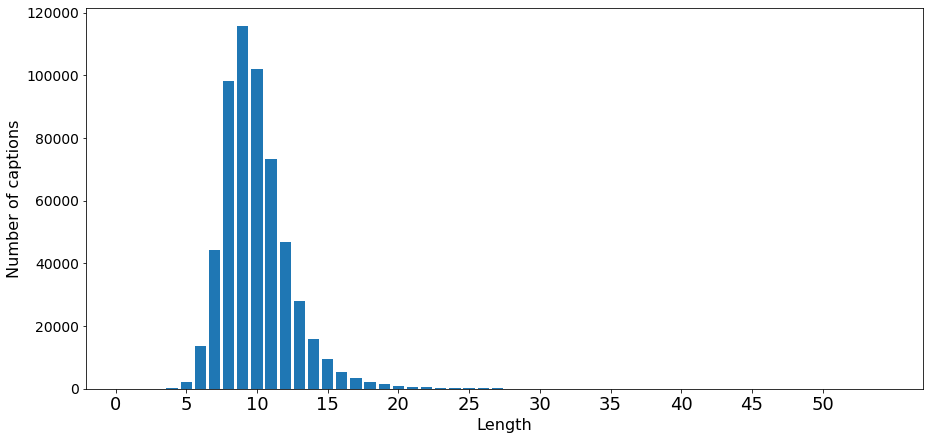

In [42]:
plt.figure(figsize=(15,7))
x_ticks = np.arange(0, 51, 5)
plt.bar(cap_labels, cap_values)
plt.ylabel('Number of captions', fontsize=16)
plt.xlabel('Length', fontsize=16)
plt.xticks(x_ticks, fontsize=18)
plt.yticks(fontsize=14)
plt.savefig(fig_save_path.joinpath('para_cap_lens.pdf'))
plt.show()

In [43]:
total_caps = len(cap_lens)
under_17 = len([l for l in cap_lens if l < 17])
print(under_17/total_caps)

0.9802555250448096


## Sample from paraphrases